## Objective Function

In [19]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# =================================== OBJECTIVE FUNCTION ===================================
MAGIC_NUMBER = 315

def objective_function(cube):
    n = cube.shape[0]
    total_difference = 0

    # Sum for each row in every 5x5 slice (plane)
    for plane in range(n):
        for row in range(n):
            row_sum = np.sum(cube[plane, row, :])
            total_difference += abs(row_sum - MAGIC_NUMBER)

    # Sum for each column in every 5x5 slice (plane)
    for plane in range(n):
        for col in range(n):
            col_sum = np.sum(cube[plane, :, col])
            total_difference += abs(col_sum - MAGIC_NUMBER)

    # Sum for each "pillar" (column through planes)
    for row in range(n):
        for col in range(n):
            pillar_sum = np.sum(cube[:, row, col])
            total_difference += abs(pillar_sum - MAGIC_NUMBER)

    # Sum for each main diagonal in every plane
    for plane in range(n):
        diag1_sum = np.sum([cube[plane, i, i] for i in range(n)])
        diag2_sum = np.sum([cube[plane, i, n - 1 - i] for i in range(n)])
        total_difference += abs(diag1_sum - MAGIC_NUMBER)
        total_difference += abs(diag2_sum - MAGIC_NUMBER)

    # Sum for space diagonals
    space_diag1 = np.sum([cube[i, i, i] for i in range(n)])
    space_diag2 = np.sum([cube[i, i, n - 1 - i] for i in range(n)])
    space_diag3 = np.sum([cube[i, n - 1 - i, i] for i in range(n)])
    space_diag4 = np.sum([cube[n - 1 - i, i, i] for i in range(n)])

    total_difference += abs(space_diag1 - MAGIC_NUMBER)
    total_difference += abs(space_diag2 - MAGIC_NUMBER)
    total_difference += abs(space_diag3 - MAGIC_NUMBER)
    total_difference += abs(space_diag4 - MAGIC_NUMBER)

    return -total_difference

## Helper Functions

In [20]:
# =================================== HELPER FUNCTIONS ===================================
def generate_random_state():
    numbers = np.arange(1, 126)
    np.random.shuffle(numbers)
    cube = numbers.reshape((5, 5, 5))
    return cube

def generate_neighbor(cube):
    neighbor = cube.copy()
    flattened_cube = neighbor.flatten()
    idx1, idx2 = np.random.choice(len(flattened_cube), size=2, replace=False)
    flattened_cube[idx1], flattened_cube[idx2] = flattened_cube[idx2], flattened_cube[idx1]
    neighbor = flattened_cube.reshape(cube.shape)
    return neighbor

def visualize_cube(cube, title="Cube State"):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title, fontsize=16)

    for i in range(5):
        axes[i].imshow(cube[i], cmap="viridis", aspect="equal")
        for x in range(5):
            for y in range(5):
                axes[i].text(y, x, str(cube[i, x, y]), va='center', ha='center', color="white")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_title(f"Slice {i+1}")

    plt.show()

## Local Search Algorithms

1. Steepest Ascent Hill Climbing

In [21]:
# =================================== Steepest Ascent Hill Climbing ===================================
def steepest_ascent_hill_climbing(max_iterations=200, num_neighbors=100):
    initial_state = generate_random_state()
    current_state = initial_state
    current_value = objective_function(current_state)

    start_time = time.time()
    value_history = [current_value]  

    for iteration in range(max_iterations):
        best_neighbor = None
        best_neighbor_value = -np.inf

        # Search for the best neighbors
        for _ in range(num_neighbors):
            neighbor = generate_neighbor(current_state)
            neighbor_value = objective_function(neighbor)

            # Keep track of the best neighbor
            if neighbor_value > best_neighbor_value:
                best_neighbor, best_neighbor_value = neighbor, neighbor_value

        # If the best neighbor is better, move to it
        if best_neighbor_value > current_value:
            current_state, current_value = best_neighbor, best_neighbor_value

        # If no better neighbor, stop (local maximum reached)
        else:
            print("Local maximum reached.")
            break

        value_history.append(current_value)

    end_time = time.time()
    duration = end_time - start_time
    print(f"Steepest Ascent Hill Climbing finished after {iteration + 1} iterations")
    return initial_state, current_state, current_value, value_history, duration

2. Hill Climbing with Sideways Move

In [22]:
# =================================== Hill CLimbing Sideways ===================================
def hill_climbing_with_sideways_move(max_iterations=10000, max_sideways=10):
    current_state = generate_random_state()
    initial_state = current_state
    current_value = objective_function(current_state)

    sideways_moves = 0  # Count jumlah sideways move
    iteration = 0

    start_time = time.time()
    value_history = [current_value]  # Untuk melacak value di setiap iterasi

    while iteration < max_iterations:
        neighbor = generate_neighbor(current_state)
        neighbor_value = objective_function(neighbor)

        # If better neighbor
        if neighbor_value > current_value:
            current_state = neighbor
            current_value = neighbor_value
            sideways_moves = 0  # Reset sideway move
        elif neighbor_value == current_value:
            # If value sama, accept as sideways move
            if sideways_moves <= max_sideways:
                current_state = neighbor
                current_value = neighbor_value
                sideways_moves += 1  # Increment sideways move
            else:
                # If max sideways move reached, berhenti
                break
        else:
            # Worse neighbor, abaikan
            pass

        value_history.append(current_value)
        iteration += 1

    end_time = time.time()
    duration = end_time - start_time

    print(f"Hill Climbing with Sideways Move finished after {iteration} iterations")

    return initial_state, current_state, current_value, value_history, duration

3. Stochastic Hill Climbing

In [23]:
# =================================== Stochastic Hill Climbing ===================================
def stochastic_hill_climbing(max_iterations=100000):
    # Store the initial state at the start of the algorithm
    initial_state = generate_random_state()
    current_state = initial_state
    current_value = objective_function(current_state)

    start_time = time.time()
    value_history = [current_value] 

    for iteration in range(max_iterations):
        neighbor = generate_neighbor(current_state)  # Choose a random neighbor
        neighbor_value = objective_function(neighbor)

        # If neighbor is better, move to the neighbor
        if neighbor_value > current_value:
            current_state, current_value = neighbor, neighbor_value

        value_history.append(current_value)

    end_time = time.time()
    duration = end_time - start_time

    print(f"Stochastic Hill Climbing finished after {iteration + 1} iterations")
    return initial_state, current_state, current_value, value_history, duration

4. Random Restart Hill Climbing

In [24]:
# =================================== Random Restart ===================================
def random_restart_hill_climbing(max_restarts=7, max_iterations=200, num_neighbors=100):
    best_state = None
    best_value = -np.inf
    overall_value_history = []
    total_iterations = 0

    start_time = time.time()

    for restart in range(max_restarts):
        print(f"\nRestart {restart + 1}/{max_restarts}")
        initial_state, current_state, current_value, value_history, restart_duration = steepest_ascent_hill_climbing(max_iterations, num_neighbors)

        # Track value history and total iterations
        overall_value_history.extend(value_history)
        total_iterations += len(value_history)

        # Check if the result from this run is the best
        current_value = value_history[-1]
        if current_value > best_value:
            best_value = current_value
            best_state = current_state

        print(f"Iterations in this restart: {len(value_history)}")

    end_time = time.time()
    duration = end_time - start_time

    print(f"\nTotal restarts: {restart + 1}")
    print(f"Total iterations across all restarts: {total_iterations}")

    return initial_state, current_state, best_value, overall_value_history, duration

5. Simulated Annealing

In [25]:
# =================================== Simulated Annealing ===================================
def simulated_annealing(max_iterations=100000, initial_temperature=1000, cooling_rate=0.999):
    initial_state = generate_random_state()
    current_state = initial_state
    current_value = objective_function(current_state)
    temperature = initial_temperature
    value_history = [current_value]
    probability_history = []
    stuck_count = 0

    start_time = time.time()

    for iteration in range(max_iterations):
        neighbor = generate_neighbor(current_state)
        neighbor_value = objective_function(neighbor)
        delta_e = neighbor_value - current_value

        if delta_e > 0:
            # Accept better neighbor
            current_state, current_value = neighbor, neighbor_value
        else:
            # Calculate acceptance rate
            probability = np.exp(delta_e / temperature)
            probability_history.append(probability)

            if np.random.random() < probability:
                # Accept worse neighbor based on probability
                current_state, current_value = neighbor, neighbor_value
            else:
                # Increment stuck count if no improvement
                stuck_count += 1

        value_history.append(current_value)
        temperature *= cooling_rate

        if temperature == 0:  # Stop if temp gets too low
            print(f"Simulated Annealing Finished early due to low temperature at iteration {iteration}")
            break

    end_time = time.time()
    duration = end_time - start_time

    print(f"Total Iterations: {iteration + 1}")
    print(f"Stuck Count (Local Optima): {stuck_count}")

    # Plotting e^(Delta E / T) over Iterations
    plt.plot(probability_history, label="Acceptance Probability (e^(ΔE / T))")
    plt.xlabel("Iterations")
    plt.ylabel("Acceptance Probability")
    plt.title("Simulated Annealing: e^(ΔE / T) over Iterations")
    plt.legend()
    plt.show()

    return initial_state, current_state, current_value, value_history, duration

6. Genetic Algorithm

In [26]:
# Function to create initial population
def create_initial_population(pop_size):
    population = []
    for _ in range(pop_size):
        cube = generate_random_state()
        population.append(cube)
    return population

# Function to select parents with normalization
def select_parents(population, fitnesses):
    min_fitness = min(fitnesses)
    if min_fitness < 0:
        normalized_fitnesses = [f - min_fitness + 1 for f in fitnesses]
    else:
        normalized_fitnesses = fitnesses

    if sum(normalized_fitnesses) == 0:
        return random.sample(population, 2)

    parents = random.choices(population, weights=normalized_fitnesses, k=2)
    return parents

# Crossover function
def crossover(parent1, parent2):
    n = parent1.shape[0]
    offspring = np.empty_like(parent1)
    for i in range(n):
        offspring[i] = parent1[i] if i < n // 2 else parent2[i]
    return offspring

# Mutation function
def mutate(cube, mutation_rate=0.1):
    if random.random() < mutation_rate:
        return generate_neighbor(cube)
    return cube

# Function to print cube visualisation
def print_cube_state(cube, title="Cube State"):
    print(f"\n{title}")
    num_slices = cube.shape[0]
    slice_height, slice_width = cube.shape[1], cube.shape[2]

    slice_titles = [f"Slice {i+1}" for i in range(num_slices)]
    print("                    ".join(slice_titles))

    for row in range(slice_height):
        row_data = []
        for slice_idx in range(num_slices):
            row_data.append(" ".join(f"{cube[slice_idx, row, col]:3}" for col in range(slice_width)))
        print("     ".join(row_data))

# Genetic Algorithm with array visualization
def genetic_algorithm(pop_size, max_generations, mutation_rate):
    population = create_initial_population(pop_size)
    start_time = time.time()

    # Initial state visualization as array
    initial_fitnesses = [objective_function(individual) for individual in population]
    initial_best_index = np.argmax(initial_fitnesses)
    initial_best_individual = population[initial_best_index]

    best_fitness_history = []
    avg_fitness_history = []

    for generation in range(max_generations):
        fitnesses = [objective_function(individual) for individual in population]
        best_fitness = max(fitnesses)
        avg_fitness = np.mean(fitnesses)

        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)

        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, fitnesses)
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)

            offspring1 = mutate(offspring1, mutation_rate)
            offspring2 = mutate(offspring2, mutation_rate)

            new_population.extend([offspring1, offspring2])

        population = new_population

    duration = time.time() - start_time
    print(f"\nPop {pop_size}, {max_generations} Iterations")
    print(f"  Duration: {duration:.2f} seconds")
    print(f"  Final Objective Function Value: {best_fitness}")

    # Final state visualization as array
    best_index = np.argmax(fitnesses)
    best_individual = population[best_index]
    print_cube_state(initial_best_individual, title="Initial State - Best Individual")
    print_cube_state(best_individual, title="Final State - Best Individual")

    return best_individual, best_fitness_history, avg_fitness_history

# Test function without cube visualizations, only graphs
def test_genetic_algorithm():
    mutation_rate = 0.1
    pop_sizes = []
    max_generations = []

    print("Control Parameters")

    for i in range(3):
        size = int(input(f"Input population size variation #{i+1}: "))
        pop_sizes.append(size)

    for i in range(3):
        generation = int(input(f"Input iteration count variation #{i+1}: "))
        max_generations.append(generation)

    fig, axes = plt.subplots(len(pop_sizes), len(max_generations), figsize=(24, 16))

    for trial in range(3):
        print(f"\n\n+===================== GENETIC ALGORITHM TRIAL {trial + 1} =====================+")
        for row, pop_size in enumerate(pop_sizes):
            for col, gen_count in enumerate(max_generations):
                ax = axes[row, col]
                best_cube, best_fitness_history, avg_fitness_history = genetic_algorithm(pop_size, gen_count, mutation_rate)

                ax.plot(best_fitness_history, label=f"Best Fitness T{trial + 1}")
                ax.plot(avg_fitness_history, label=f"Average Fitness T{trial + 1}", linestyle='--')
                ax.set_title(f"Pop Size {pop_size}, Gen {gen_count}")
                ax.set_xlabel("Iteration")
                ax.set_ylabel("Fitness")
                ax.legend()

    plt.tight_layout()
    plt.show()

## Running Function


                                            _(`-')       _       (`-')  _                        <-. (`-')_  (`-')  _
                                            ( (OO ).->  (_)      (OO ).-/      .->         .->      \( OO) ) (OO ).-/     <-.
                                            \    .'_   ,-(`-')  / ,---.    ,---(`-') (`-')----. ,--./ ,--/  / ,---.    ,--. )
                                            '`'-..__)  | ( OO)  | \ /`.\  '  .-(OO ) ( OO).-.  '|   \ |  |  | \ /`.\   |  (`-')
                                            |  |  ' |  |  |  )  '-'|_.' | |  | .-, \ ( _) | |  ||  . '|  |) '-'|_.' |  |  |OO )
                                            |  |  / : (|  |_/  (|  .-.  | |  | '.(_/  \|  |)|  ||  |\    | (|  .-.  | (|  '__ |
                                            |  '-'  /  |  |'->  |  | |  | |  '-'  |    '  '-'  '|  | \   |  |  | |  |  |     |'
                                            `------'   `--'     `--' `--'  `-----'      `-----' `--'  `--'  `--' `--'


Running Genetic Algorithm...
Control Parameters


+===================== GENETIC ALGORITHM TRIAL 1 =====================+

Pop 10, 40 Iterations
  Duration: 0.22 seconds
  Final Objective Function Value: -4140

Initial State - Best Individual
Slice 1                    Slice 2                    Slice 3                    Slice 4                    Slice 5
 83  76  97  61  15      94  28  39  68 100     103  33 116  54  56      23  50 120   3  24      96 118  40 106  81
 48  38  17 111  42       1  91  86   4 105      19  72  57  35  52      41   9  60 123  85      30  59 115  20   7
 90  67 108   8  26      82  31  43  64  21      46  55   5  66  49     124  22 110 121  29      89  80  77  99  47
 12  73  13  44 107     104 101  10 112  58      63  25 125  92  37      16  95  93  27  70      18  88 117 114 119
122  14  78  69  11      65  98   6  84  53     102  36  45   2  71      62  51  34  74  87     113 109  79  75  32

Final State - Best Individual
Slice 1                    Sl

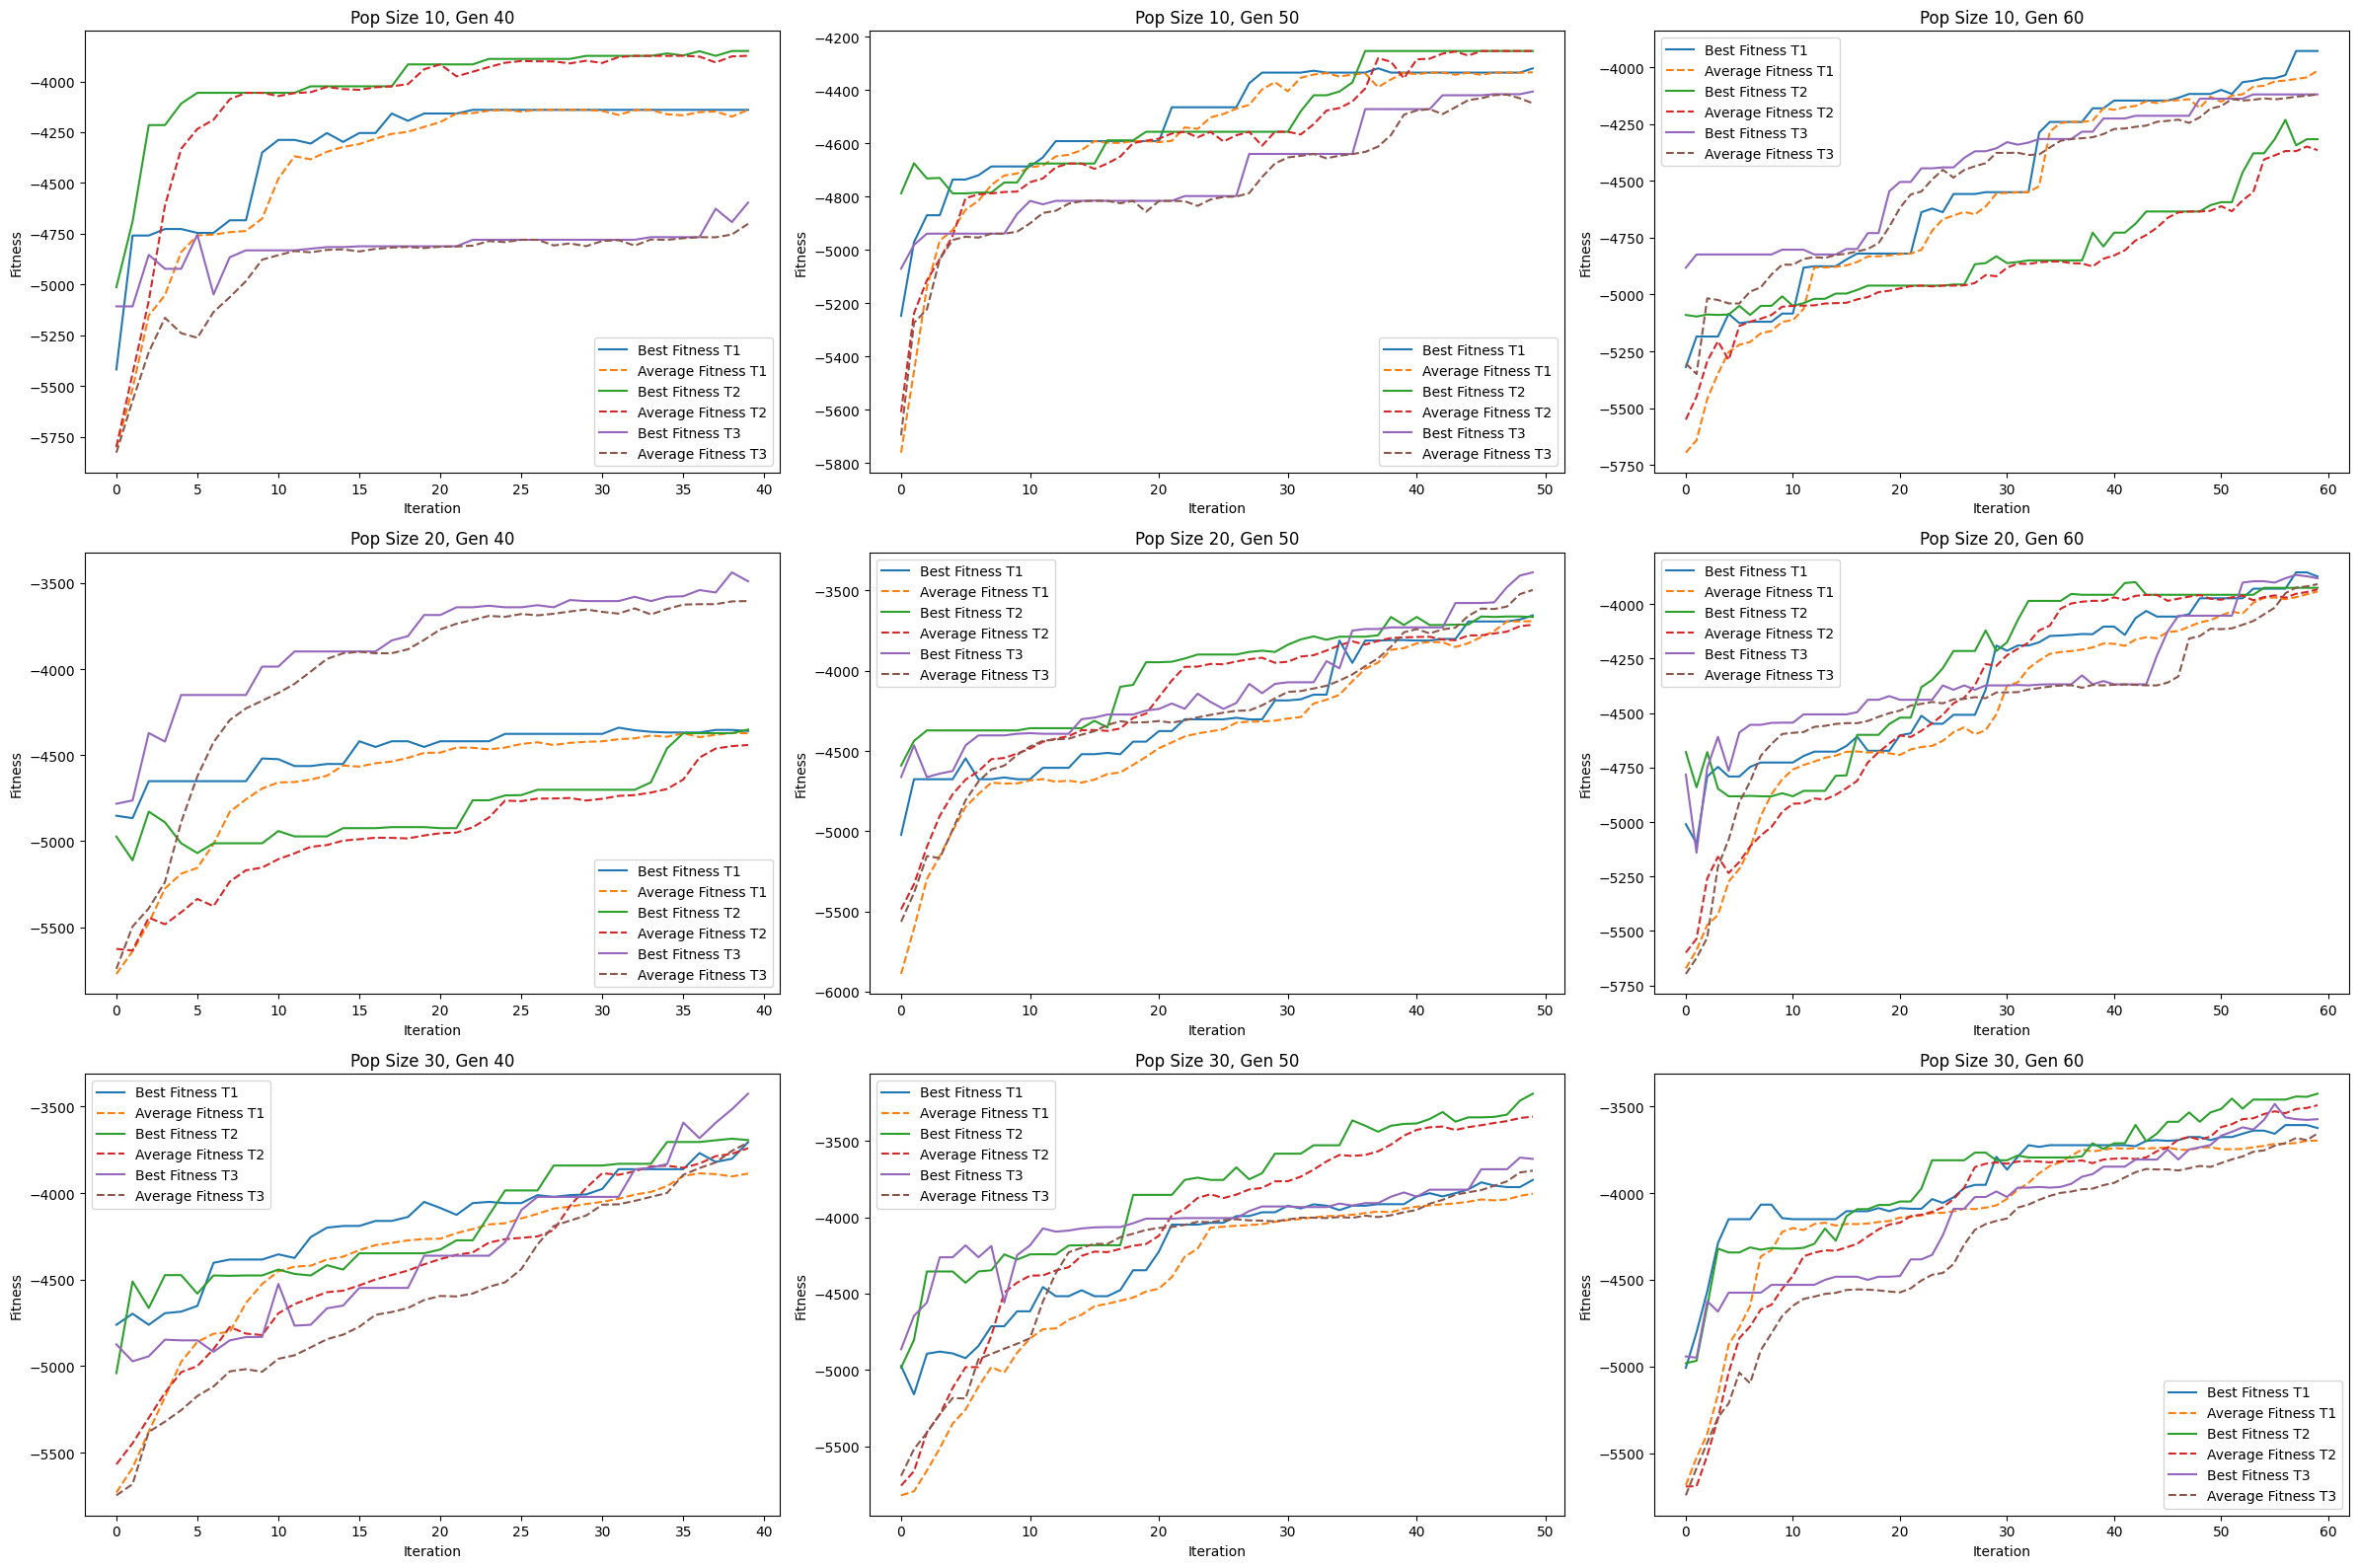

In [27]:
# =================================== RUN HERE ===================================
def illustration_cube():
  RESET = "\033[0m"
  BLUE = "\033[34m"
  ascii_art = """
                                                                          ──────▄▀▄─────▄▀▄
                                                                        ─────▄█░░▀▀▀▀▀░░█▄
                                                                        ─▄▄──█░░░░░░░░░░░█──▄▄
                                                                        █▄▄█─█░░▀░░┬░░▀░░█─█▄▄█
                                                            .........'........'........'........'........'
                                                          .. .'''' .. .`''. .. ```'' ..`.'`.`... ```` .. '
                                                        .'.......''.......''.......'........'........'  .'
                                                      ..'..' ^... `^``. ..  '`   ..  '.   . .`'''  . '`"''
                                                    .'.......''.......''.......'........'......... . '`. '
                                                  .. .. '  ..' . .. ...'.'.  ..  ..   .  '.'   .' '` ' ..'
                                                ... .'.'... .....'..  '......   '.  ..  . ....  ' ^  ^.  '
                                              ....... .''.'..' .'..'.'. .''..'.'..'..'.'. .'. `''  ..`.`''
                                            ..  `'''...  ...' .. .'... ...'...'..  .'''. .  ..'.'..  '''.'
                                          .........''.......''.......'........'.......''. ` .  .`  ' '  .'
                                        .. .''.....  '.`` ...` `.``....`'`''..  .`. ..  ."' ... ' '' `.. '
                                        ^........`........^.......`'.......`........` .  .  .`  .' . .^ . '
                                        ^    ..  '    .   `     . '      . '    .   ` ^  ... ..`'' .. ',,''
                                        ^ '"'.,  '  :.,"  `'' ,'`"' ^.",,`.'   `^   ` . .'  .... `.   ''  '
                                        ^  '..   '  ' '.  `.. ' . ' .....' '   .'   ` .. ..`'. ..' `, ' ..'
                                        ,........^.......'".......^........^........". . `.. '. .' '  ^.  '
                                        ^        '        `       '        '        `.^' . ....'''  ..'.`''
                                        ^ ` ` `' '  ` ''  ` .^ ^. '  .^.". '  ````  `.`. '.  ..' '..  ''. '
                                        ^ ^ ` `` '  ^ `   `  ".`. '  ...'. '  '`.`  `  ...." .  .` .^.' ..'
                                        ^        '        `       '        '        `..  .`. ... '"`' `.  '
                                        "........`........^.......`........^........^ '' .  .' ..'.  .`.'''
                                        ^  . ..  '  ' '   ` .' .  '  ....  '  .'..  ` `' ... .'".' .. '^`.'
                                        ^ .;`:"  ' .^^`^  ` ,,'I  '  :"``' '  .``;  `   .' . .   `. . '.  .
                                        ^        '        `       '        '        ` .. .`" . . ' .` '..
                                        ,........^.......'".......^........"........". . ..  `. .' . .`
                                        ^        '        `       '        '        ` ^' . . ..^`'  .
                                        ^  ,`;`  '." ^``, ` `^.,' '  `:`^` '  ."`"  ` . .' . ... '.
                                        ^  '.''  '.`.'.'' ` .'.'. '   ..'  '  .'.'  `  ....` . ..
                                        "        `       .`       `        `        ^.   .:. '.
                                        ^        '       .`       `        `        ` '^ . ..
                                        ^  ..'.  '.' ' '' `  ^ '  '  .'.'. ' ` ''.' `'^. ..
                                        ^  ``:"  '.: ,.`^ ` 'I'^` '  '^.". ' ,.^^.; `. ..
                                        ^        '        `       '        '        `..
                                        '........'........'.......'........'........'
  """

  print(f"{BLUE}{ascii_art}{RESET}")


def illustration_text():
    RESET = "\033[0m"
    BOLD = "\033[1m"
    MAGENTA = "\033[35m"

    text = """
                                            _(`-')       _       (`-')  _                        <-. (`-')_  (`-')  _
                                            ( (OO ).->  (_)      (OO ).-/      .->         .->      \( OO) ) (OO ).-/     <-.
                                            \    .'_   ,-(`-')  / ,---.    ,---(`-') (`-')----. ,--./ ,--/  / ,---.    ,--. )
                                            '`'-..__)  | ( OO)  | \ /`.\  '  .-(OO ) ( OO).-.  '|   \ |  |  | \ /`.\   |  (`-')
                                            |  |  ' |  |  |  )  '-'|_.' | |  | .-, \ ( _) | |  ||  . '|  |) '-'|_.' |  |  |OO )
                                            |  |  / : (|  |_/  (|  .-.  | |  | '.(_/  \|  |)|  ||  |\    | (|  .-.  | (|  '__ |
                                            |  '-'  /  |  |'->  |  | |  | |  '-'  |    '  '-'  '|  | \   |  |  | |  |  |     |'
                                            `------'   `--'     `--' `--'  `-----'      `-----' `--'  `--'  `--' `--'  `-----'
            """
    print(f"{BOLD}{MAGENTA}{text}{RESET}")

def illustration_text2():
    RESET = "\033[0m"
    BOLD = "\033[1m"
    GREEN = "\033[32m"

    text2 = """
                                                         _____            _           _____       _
                                                        |     | ___  ___ |_| ___     |     | _ _ | |_  ___
                                                        | | | || .'|| . || ||  _|    |   --|| | || . || -_|
                                                        |_|_|_||__,||_  ||_||___|    |_____||___||___||___|
                                                                    |___|

        """
    print(f"{BOLD}{GREEN}{text2}{RESET}")


def run_experiment():
    algorithms = {
        'Steepest Ascent Hill Climbing': steepest_ascent_hill_climbing,
        'Hill Climbing with Sideways Move': hill_climbing_with_sideways_move,
        'Stochastic Hill Climbing': stochastic_hill_climbing,
        'Random Restart Hill Climbing': random_restart_hill_climbing,
        'Simulated Annealing': simulated_annealing,
        'Genetic Algorithm': test_genetic_algorithm
    }

    print("Select the algorithm you want to run:")
    for idx, algo_name in enumerate(algorithms.keys(), 1):
        print(f"{idx}. {algo_name}")

    # User input
    # choice = int(input("Choose the number of an algorithm: "))

    try:
      choice = int(input("Choose the number of an algorithm: "))
      if choice < 1 or choice > len(algorithms):
          print("Invalid choice! Please select a valid option.")
          return
    except ValueError:
        print("Invalid input! Please enter a number corresponding to an algorithm.")
        return

    selected_algo_name = list(algorithms.keys())[choice - 1]
    selected_algo_func = algorithms[selected_algo_name]

    print(f"\nRunning {selected_algo_name}...")

    if selected_algo_name == 'Genetic Algorithm':
        selected_algo_func()
    else:
        for trial in range(3):
            print(f"\n\n+===================== TRIAL {trial + 1}: {selected_algo_name} =====================+")
            initial_state, final_state, final_value, history, duration = selected_algo_func()
            print(f"Final Objective Function Value: {final_value}")
            print(f"Duration: {duration:.2f} seconds")
            plt.plot(history, label=f'{selected_algo_name} Trial {trial + 1}')
            plt.title(f'{selected_algo_name} Trial {trial + 1}')
            plt.xlabel("Iterations")
            plt.ylabel("Objective Function Value")
            plt.legend()
            visualize_cube(initial_state, title=f"Trial {trial + 1} Initial State")
            visualize_cube(final_state, title=f"Trial {trial + 1} Final State")
            plt.show()


# Run the experiment 
illustration_text()
illustration_text2()
illustration_cube()
run_experiment()